<a href="https://colab.research.google.com/github/PabloMakka/repositorio002/blob/master/ClasFlowers_practicaIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FlowerAi

In [14]:
pip install tflite-model-maker

In [16]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import configs
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec

import matplotlib.pyplot as plt

In [18]:
image_path = tf.keras.utils.get_file(
      'flower_photos',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      untar=True)

228818944/228813984 [==============================] - 5s 0us/step


In [19]:
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


In [20]:
model = image_classifier.create(data)


INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
114/114 [==============================] - 186s 2s/step - loss: 1.0783 - accuracy: 0.6516
Epoch 2/5
114/114 [==============================] - 183s 2s/step - loss: 0.6564 - accuracy: 0.8879
Epoch 3/5
114/114 [==============================] - 183s 2s/step - loss: 0.6247 - accuracy: 0.9129
Epoch 4/5
114/114 [=======

In [21]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 23s 2s/step - loss: 0.5484 - accuracy: 0.9482


In [22]:
model.export(export_dir='.', with_metadata=True)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: /tmp/tmp3wokdx0t/assets


INFO:tensorflow:Assets written to: /tmp/tmp3wokdx0t/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpba4bjfpt/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmpba4bjfpt/labels.txt.


In [43]:
image_path = tf.keras.utils.get_file(
      'flower_photos',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      untar=True) 

In [41]:
data = ImageClassifierDataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


In [47]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

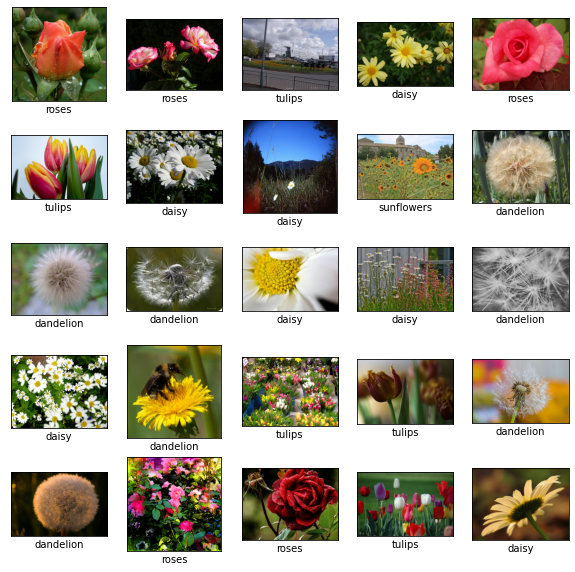

In [48]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.dataset.take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [49]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
91/91 [==============================] - 170s 2s/step - loss: 1.1573 - accuracy: 0.6122 - val_loss: 0.6302 - val_accuracy: 0.9119
Epoch 2/5
91/91 [==============================] - 168s 2s/step - loss: 0.6747 - accuracy: 0.8794 - val_loss: 0.6006 - val_accuracy: 0.9261
Epoch 3/5
91/91 [==============================] - 168s 2s/step - loss: 0.6383 - accu

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


In [51]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 22s 2s/step - loss: 0.6374 - accuracy: 0.9046


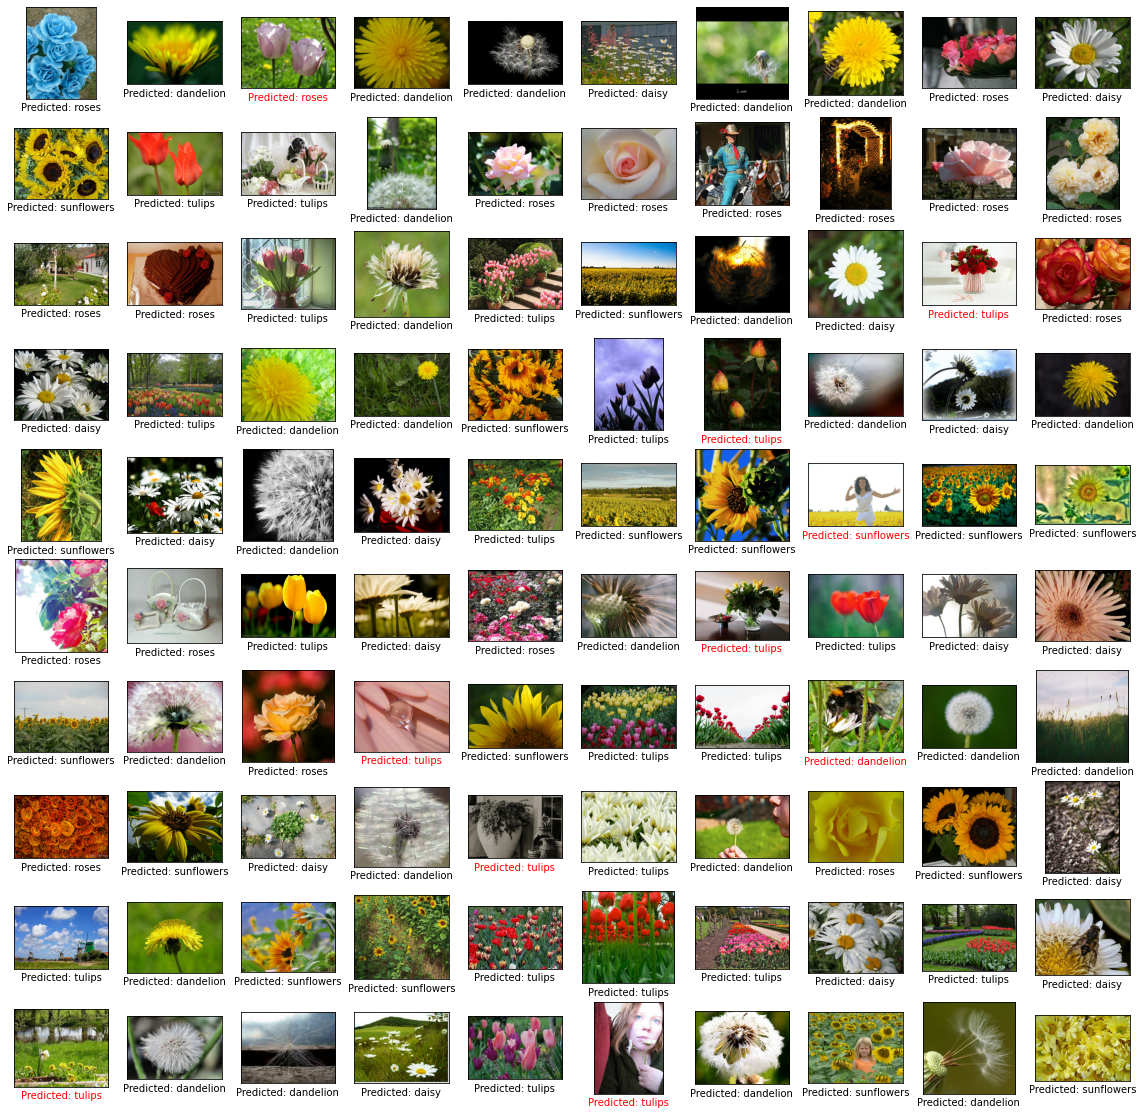

In [52]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.dataset.take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [53]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmpcavxc16s/assets


INFO:tensorflow:Assets written to: /tmp/tmpcavxc16s/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp338ctori/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmp338ctori/labels.txt.


In [54]:
model.evaluate_tflite('model.tflite', test_data)

INFO:tensorflow:Processing example: #0
[[[[0.47843137 0.49411765 0.40392157]
   [0.47212887 0.48781514 0.39131653]
   [0.48249298 0.48865545 0.3882353 ]
   ...
   [0.5084731  0.5119046  0.41043386]
   [0.5232494  0.50770324 0.42521015]
   [0.5137255  0.4862745  0.41568628]]

  [[0.5204482  0.49467787 0.4       ]
   [0.51076937 0.484999   0.3842437 ]
   [0.5027911  0.4797419  0.3706983 ]
   ...
   [0.5298315  0.5339633  0.44257155]
   [0.55398166 0.5441178  0.4650161 ]
   [0.54649866 0.52745104 0.45294118]]

  [[0.5579832  0.5058824  0.4022409 ]
   [0.54627854 0.49417767 0.38783514]
   [0.5270909  0.48077232 0.372409  ]
   ...
   [0.49991956 0.5042514  0.42210844]
   [0.519788   0.5139057  0.43791527]
   [0.5092437  0.49859947 0.42464986]]

  ...

  [[0.46638733 0.45070106 0.41540694]
   [0.5397665  0.49842006 0.4656019 ]
   [0.52249956 0.48729563 0.44572908]
   ...
   [0.28074795 0.26021975 0.16883814]
   [0.2710385  0.25242108 0.16749719]
   [0.28039193 0.2633052  0.17787105]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.47843137 0.49411765 0.40392157]
   [0.47212887 0.48781514 0.39131653]
   [0.48249298 0.48865545 0.3882353 ]
   ...
   [0.5084731  0.5119046  0.41043386]
   [0.5232494  0.50770324 0.42521015]
   [0.5137255  0.4862745  0.41568628]]

  [[0.5204482  0.49467787 0.4       ]
   [0.51076937 0.484999   0.3842437 ]
   [0.5027911  0.4797419  0.3706983 ]
   ...
   [0.5298315  0.5339633  0.44257155]
   [0.55398166 0.5441178  0.4650161 ]
   [0.54649866 0.52745104 0.45294118]]

  [[0.5579832  0.5058824  0.4022409 ]
   [0.54627854 0.49417767 0.38783514]
   [0.5270909  0.48077232 0.372409  ]
   ...
   [0.49991956 0.5042514  0.42210844]
   [0.519788   0.5139057  0.43791527]
   [0.5092437  0.49859947 0.42464986]]

  ...

  [[0.46638733 0.45070106 0.41540694]
   [0.5397665  0.49842006 0.4656019 ]
   [0.52249956 0.48729563 0.44572908]
   ...
   [0.28074795 0.26021975 0.16883814]
   [0.2710385  0.25242108 0.16749719]
   [0.28039193 0.2633052  0.17787105]]

  [[0.

{'accuracy': 0.9046321525885559}

In [55]:
model.evaluate_tflite('model.tflite', test_data)

INFO:tensorflow:Processing example: #0
[[[[0.47843137 0.49411765 0.40392157]
   [0.47212887 0.48781514 0.39131653]
   [0.48249298 0.48865545 0.3882353 ]
   ...
   [0.5084731  0.5119046  0.41043386]
   [0.5232494  0.50770324 0.42521015]
   [0.5137255  0.4862745  0.41568628]]

  [[0.5204482  0.49467787 0.4       ]
   [0.51076937 0.484999   0.3842437 ]
   [0.5027911  0.4797419  0.3706983 ]
   ...
   [0.5298315  0.5339633  0.44257155]
   [0.55398166 0.5441178  0.4650161 ]
   [0.54649866 0.52745104 0.45294118]]

  [[0.5579832  0.5058824  0.4022409 ]
   [0.54627854 0.49417767 0.38783514]
   [0.5270909  0.48077232 0.372409  ]
   ...
   [0.49991956 0.5042514  0.42210844]
   [0.519788   0.5139057  0.43791527]
   [0.5092437  0.49859947 0.42464986]]

  ...

  [[0.46638733 0.45070106 0.41540694]
   [0.5397665  0.49842006 0.4656019 ]
   [0.52249956 0.48729563 0.44572908]
   ...
   [0.28074795 0.26021975 0.16883814]
   [0.2710385  0.25242108 0.16749719]
   [0.28039193 0.2633052  0.17787105]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.47843137 0.49411765 0.40392157]
   [0.47212887 0.48781514 0.39131653]
   [0.48249298 0.48865545 0.3882353 ]
   ...
   [0.5084731  0.5119046  0.41043386]
   [0.5232494  0.50770324 0.42521015]
   [0.5137255  0.4862745  0.41568628]]

  [[0.5204482  0.49467787 0.4       ]
   [0.51076937 0.484999   0.3842437 ]
   [0.5027911  0.4797419  0.3706983 ]
   ...
   [0.5298315  0.5339633  0.44257155]
   [0.55398166 0.5441178  0.4650161 ]
   [0.54649866 0.52745104 0.45294118]]

  [[0.5579832  0.5058824  0.4022409 ]
   [0.54627854 0.49417767 0.38783514]
   [0.5270909  0.48077232 0.372409  ]
   ...
   [0.49991956 0.5042514  0.42210844]
   [0.519788   0.5139057  0.43791527]
   [0.5092437  0.49859947 0.42464986]]

  ...

  [[0.46638733 0.45070106 0.41540694]
   [0.5397665  0.49842006 0.4656019 ]
   [0.52249956 0.48729563 0.44572908]
   ...
   [0.28074795 0.26021975 0.16883814]
   [0.2710385  0.25242108 0.16749719]
   [0.28039193 0.2633052  0.17787105]]

  [[0.

{'accuracy': 0.9046321525885559}

In [57]:
config = configs.QuantizationConfig.create_full_integer_quantization(representative_data=test_data, is_integer_only=True)

In [58]:
model.export(export_dir='.', tflite_filename='model_quant.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmp0yawbp8y/assets


INFO:tensorflow:Assets written to: /tmp/tmp0yawbp8y/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmphoxxuas4/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmphoxxuas4/labels.txt.


In [59]:
model = image_classifier.create(train_data, model_spec=model_spec.mobilenet_v2_spec, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5
91/91 [==============================] - 136s 1s/step - loss: 1.1488 - accuracy: 0.6353 - val_loss: 0.6718 - val_accuracy: 0.9006
Epoch 2/5
91/91 [==============================] - 132s 1s/step - loss: 0.7236 - accuracy: 0.8587 - val_loss: 0.6396 - val_accuracy: 0.9290
Epoch 3/5
91/91 [==============================] - 132s 1s/step - loss: 0.6710 - accu

In [ ]:
loss, accuracy = model.evaluate(test_data)

In [ ]:
inception_v3_spec = model_spec.ImageModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

In [60]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_3 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10
91/91 [==============================] - 170s 2s/step - loss: 1.1708 - accuracy: 0.5913 - val_loss: 0.6332 - val_accuracy: 0.9148
Epoch 2/10
91/91 [==============================] - 168s 2s/step - loss: 0.6860 - accuracy: 0.8789 - val_loss: 0.6056 - val_accuracy: 0.9261
Epoch 3/10
91/91 [==============================] - 168s 2s/step - loss: 0.6369 - a

In [ ]:
loss, accuracy = model.evaluate(test_data) 